# Titanic Statistics

Key attributes within the dataset include:

- Passenger Class (Pclass): This categorical variable indicates the ticket class of each passenger, ranging from 1st class (wealthiest) to 3rd class (lower socioeconomic status).

- Name: The names of passengers, providing insight into their identities.

- Sex: Gender of passengers, categorized as male or female.

- Age: Age of passengers, providing information about the demographic composition of the Titanic's passengers.

- SibSp: Number of siblings/spouses aboard the Titanic, offering insight into family relationships.

- Parch: Number of parents/children aboard the Titanic, indicating family size and composition.

- Ticket: Ticket number, providing additional information about passenger accommodations and fare details.

- Fare: Fare paid by each passenger, which can be indicative of their ticket class and economic status.

- Cabin: Cabin number or location, offering insights into passenger accommodations.

- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton), providing information about passengers' embarkation points.

- Survived: This binary variable indicates whether a passenger survived the disaster (1) or not (0), serving as the primary outcome variable for analyses.

#### Statistical questions

---

# 📘 **Medium Difficulty Questions (5)**

| # | Question                                       | Statistical Concept          | Chart               |
| - | ---------------------------------------------- | ---------------------------- | ------------------- |
| 1 | Did women survive at higher rates than men?    | Proportion test / chi-square | Grouped bar chart   |
| 2 | Did survival differ by passenger class?        | Chi-square test              | Stacked bar chart   |
| 3 | Is fare correlated with survival?              | Logistic regression (simple) | Boxplot / violin    |
| 4 | Are younger passengers more likely to survive? | T-test / logistic regression | Histogram / KDE     |
| 5 | Did families (SibSp + Parch > 0) survive more? | Chi-square                   | Clustered bar chart |

---

# 📘 **Hard Questions (10)**

| #  | Question                                                           | Statistical Method               | Chart             |
| -- | ------------------------------------------------------------------ | -------------------------------- | ----------------- |
| 1  | Is survival probability nonlinear with age?                        | Polynomial logistic regression   | Probability curve |
| 2  | Predict survival using 3 features: Sex, Class, Fare                | Multivariate logistic regression | ROC curve         |
| 3  | Is class effect still significant after controlling for fare?      | Hierarchical logistic regression | Coefficient plot  |
| 4  | Are families with size = 3–5 most likely to survive?               | ANOVA on survival probability    | Scatter + trend   |
| 5  | Do mothers with children survive at higher rates?                  | Interaction model (Sex × Parch)  | Faceted barplot   |
| 6  | Is fare distribution heavy-tailed?                                 | Skew/Kurtosis, log-transform     | Log-histogram     |
| 7  | Does cabin availability affect survival?                           | Missingness impact analysis      | Missing map       |
| 8  | Does age predict survival differently for men vs women?            | Interaction logistic regression  | Faceted KDE       |
| 9  | Can we cluster passengers into survival-like groups?               | K-means clustering               | Cluster scatter   |
| 10 | Do older 1st-class passengers survive more than younger 3rd-class? | Two-way ANOVA                    | Pivot heatmap     |

---

# 📘 **Very Hard Questions (10)**

These bring **real business analytics** thinking.

| #  | Question                                                             | Statistical Method                              | Chart                   |
| -- | -------------------------------------------------------------------- | ----------------------------------------------- | ----------------------- |
| 1  | Build an optimal survival scoring model                              | Regularized logistic regression (L1/L2)         | ROC + Precision/Recall  |
| 2  | Estimate causal effect of gender on survival controlling confounders | Propensity score matching                       | Matched distributions   |
| 3  | What is the marginal effect of fare on survival?                     | Marginal Effects (Dy/Dx)                        | Marginal plot           |
| 4  | Estimate survival uplift by upgrading to higher class                | Uplift modeling                                 | Uplift curve            |
| 5  | Does the Titanic show Simpson’s paradox?                             | Simpson analysis                                | Grouped trend chart     |
| 6  | How many lives could be saved under optimal seat allocation?         | Counterfactual simulation                       | Simulation plot         |
| 7  | Predict survival with missingness handled robustly                   | Multiple imputation + logistic regression       | MI diagnostics          |
| 8  | Segment passengers into survival “archetypes”                        | Gaussian Mixture Models                         | Density clusters        |
| 9  | Build a Bayesian survival model with priors                          | Bayesian logistic regression                    | Posterior distributions |
| 10 | Evaluate fairness: was survival biased by gender/class?              | Fairness metrics (disparate impact, equal odds) | Fairness bars           |




In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2, mannwhitneyu
from scipy.stats.contingency import association
import statsmodels.formula.api as smf
import statsmodels.stats.weightstats as smw
import statsmodels.api as sma

### Data statistics for referencee

In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

df = pd.read_csv(url)

#print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Check for mising value count
print("Missing values:")
print(df.isnull().sum())

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Statistical Questions

### Did women survive at higher rates than men?

- **Null Hypothesis**: Men and womend survided at the same rate, no difference.
- **Alternatice Hypothesis**: Women survie rate is higher than men.

In [7]:
# Compute survival rate by gender
contingency = pd.crosstab(df['Sex'], df['Survived'])
print(contingency)

Survived    0    1
Sex               
female     81  233
male      468  109


In [8]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency)

print("Chi2 Statistical data:")
print(f"Chi2 Statistics: {chi2_stat}")
print(f"P value: {p_value}")
print(f"Degree of freedom: {dof}")
print(f"Expected Freq: \n{pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)}")

Chi2 Statistical data:
Chi2 Statistics: 260.71702016732104
P value: 1.1973570627755645e-58
Degree of freedom: 1
Expected Freq: 
Survived           0           1
Sex                             
female    193.474747  120.525253
male      355.525253  221.474747


**Conslusion**
- The value for Chi Squared is 260 which indicates that we have a very low p-value which is nearly close to 0. Which indicates there is no random chances involved.
- We can reject the Null Hypothesis and accpet the Alternative Hypothesis.

**Women survive rate is much higher than men**

/home/subrata/Documents/Study/Mathematical Stats/.venv/lib/python3.12/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


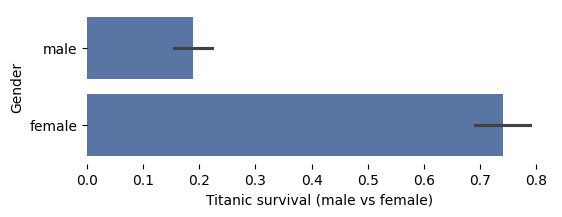

In [9]:
f, ax = plt.subplots(figsize=(6, 2))
sns.set_color_codes("deep")
sns.barplot(x="Survived", y="Sex", data=df, color="b")
ax.set(ylabel="Gender", xlabel="Titanic survival (male vs female)")
sns.despine(left=True, bottom=True)
plt.show()

### Did survival differ by passenger class?

- **Null Hypothesis**: Survival do not differ by passenger class, no difference.
- **Alternatice Hypothesis**: Survival do differ by passenger class.

In [10]:
# Create cross table
contintengy_pclass = pd.crosstab(df['Pclass'], df['Survived'])
print(contintengy_pclass)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [11]:
chi2_stat, p_value, dof, expected = chi2_contingency(contintengy_pclass)

print("Chi2 Statistical data:")
print(f"Chi2 Statistics: {chi2_stat}")
print(f"P value: {p_value}")
print(f"Degree of freedom: {dof}")
print(f"Expected Freq: \n{pd.DataFrame(expected, index=contintengy_pclass.index, columns=contintengy_pclass.columns)}")

Chi2 Statistical data:
Chi2 Statistics: 102.88898875696056
P value: 4.549251711298793e-23
Degree of freedom: 2
Expected Freq: 
Survived           0           1
Pclass                          
1         133.090909   82.909091
2         113.373737   70.626263
3         302.535354  188.464646


**Conslusion**
- The value for Chi Squared is 102 which indicates that we have a very low p-value which is nearly close to 0. Which indicates there is no random chances involved.
- We can reject the Null Hypothesis and accpet the Alternative Hypothesis.

**Survival differ by passenger class, 3rd class passenger had 3 times less survial to the other class**

/home/subrata/Documents/Study/Mathematical Stats/.venv/lib/python3.12/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


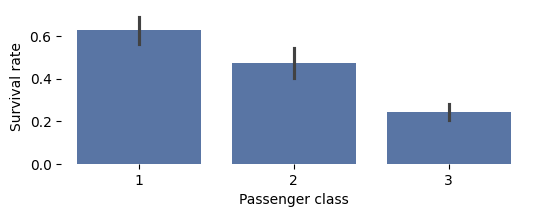

In [12]:
f, ax = plt.subplots(figsize=(6, 2))
sns.set_color_codes("deep")
sns.barplot(y="Survived", x="Pclass", data=df, color="b")
ax.set(ylabel="Survival rate", xlabel="Passenger class")
sns.despine(left=True, bottom=True)
plt.show()

### Is fare correlated with survival?

- **Null Hypothesis**: Fare has no correlation with survival, no difference.
- **Alternatice Hypothesis**: Correlation of survival to fare is statistically significant.

In [13]:
# Check for missing data
print(df['Fare'].isna().sum())

0


In [14]:
df_groupby_sf = df.groupby('Survived')['Fare']
print(f"Mean: {df_groupby_sf.mean()}")
print(f"Median: {df_groupby_sf.median()}")
df_groupby_sf.describe()

Mean: Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64
Median: Survived
0    10.5
1    26.0
Name: Fare, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


/home/subrata/Documents/Study/Mathematical Stats/.venv/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Survived', ylabel='Fare'>

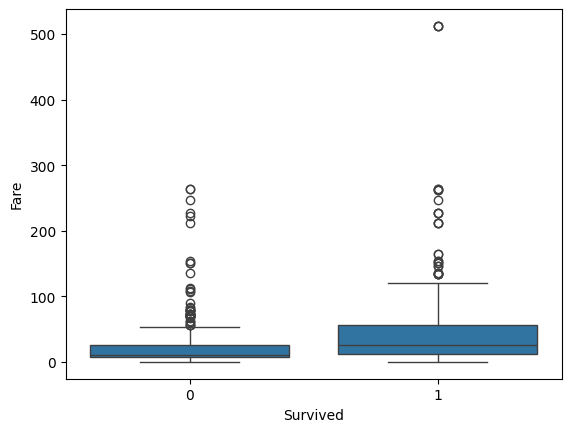

In [15]:
sns.boxplot(x="Survived", y="Fare", data=df)

Now find the Mann-Whitney U test

In [16]:
fare_survived = df[df['Survived'] == 1]['Fare']
fare_dead = df[df['Survived'] == 0]['Fare']

In [17]:
stat, p_value = mannwhitneyu(fare_survived, fare_dead, alternative='two-sided')

print("Mann–Whitney U statistic:", stat)
print("P-value:", p_value)

Mann–Whitney U statistic: 129951.5
P-value: 4.553477179250237e-22


Given such lower value pf p-value which is almost clsoe to zero and such higher U vlaue, the Null Hypothesis is rejected. There is correlation between fare and survival.
Higher the fare, more the survival.

This aligns with what we know about Titanic:

- Higher fare → higher class
- Higher class → better access to lifeboats
- Better access → higher survival rate

Logistic Regression

In [18]:
model = smf.logit("Survived ~ Fare", data=df)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Dec 2025   Pseudo R-squ.:                 0.05822
Time:                        00:43:34   Log-Likelihood:                -558.78
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.427e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9413      0.095     -9.895      0.000      -1.128      -0.755
Fare           0.0152      0.

**1. The P-value (P>|z|) Value: 0.000**

Interpretation: This is highly statistically significant (it's less than the standard threshold of 0.05). This indicates that the Fare variable has a meaningful, non-zero relationship with Survival. We can be confident that this relationship is not due to random chance in the data sample. 

**2. The Coefficient (coef) Value: 0.0152**

Interpretation: The coefficient is positive, meaning that as Fare increases, the likelihood (specifically, the log-odds) of Survival increases.In logistic regression, we often interpret coefficients using Odds Ratios (\(\text{Odds\ Ratio}=e^{\text{coef}}\)) to make them easier to understand: \(e^{0.0152}\approx 1.0153\) Odds Ratio Interpretation: For every one unit increase in the ticket fare (e.g., one dollar or pound increase), the odds of surviving increase by about 1.53%.

**3. The Intercept Value: -0.9413**

Interpretation: This is the baseline log-odds of survival when all other predictors in the model are zero. In this case, it’s the log-odds of survival for a person who paid a Fare of $0. This isn't usually the focus of the interpretation unless a $0 fare is common or meaningful. 

**4. Confidence Interval ([0.025 to 0.975]) Range: 0.011 to 0.020**

Interpretation: We can be 95% confident that the true population coefficient for Fare lies between 0.011 and 0.020. Since this interval does not contain zero, it confirms the statistical significance we saw in the P-value column. 

**Based on these results, we can conclude that the price of a passenger's ticket was a significant predictor of survival on the Titanic. Passengers who paid higher fares had statistically higher odds of surviving the disaster.**


### Are younger passengers more likely to survive?

- **Null Hypothesis**: All age passenger survived the same, no difference.
- **Alternatice Hypothesis**: Younger passenger more likely to survive is statistically significant.

In [19]:
# check for missing values
print(df['Age'].isna().sum())

177


In [20]:
# describe Age column
print(df['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [21]:
# replace missing values with median value
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

print(median_age)
print(df['Age'].describe())
print(df['Age'].isna().sum())

28.0
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
0


<Axes: xlabel='Age', ylabel='Survived'>

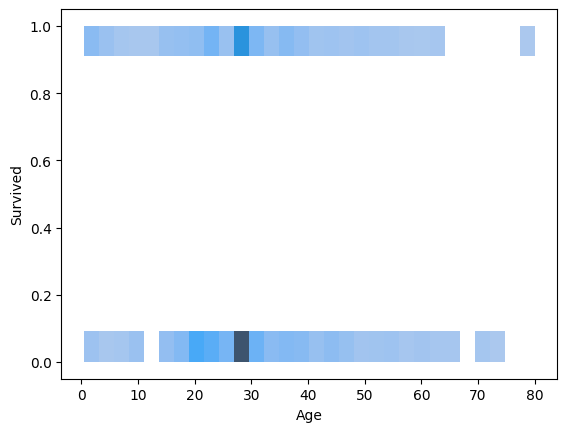

In [22]:
# Visualize the Age vs Survived data
sns.histplot(data=df, x='Age', y='Survived', kde=True)

<Axes: xlabel='Age', ylabel='Count'>

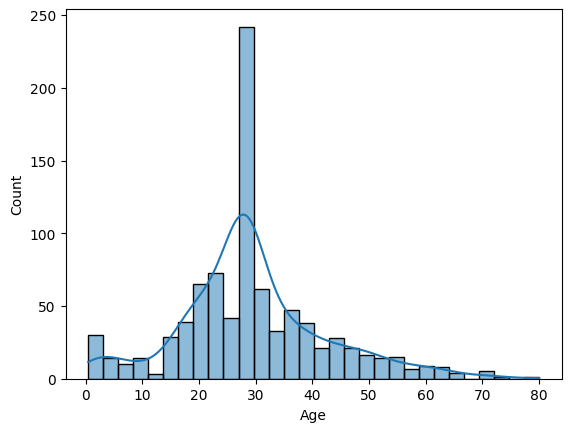

In [23]:
# Check the distribution for Age
sns.histplot(data=df, x='Age', kde=True)

First we will do T-test

In [24]:
age_survived = df[df["Survived"] == 1]["Age"]
age_not_survived = df[df["Survived"] == 0]["Age"]

t_stat, p_value, dfree= smw.ttest_ind(age_survived, age_not_survived, alternative='two-sided', usevar='unequal', weights=(None, None), value=0)
print(t_stat)
print(f"P-value: {p_value}")

-1.8966053920256696
P-value: 0.058309159977757444



* **t-statistic = –1.8966**
* **p-value = 0.0583**
* **α (typical significance threshold) = 0.05**

---

#### ✅ **Interpretation (Mathematically)**

##### **1. p-value = 0.0583 > 0.05**

This means:

> You **do not** have enough statistical evidence to say the mean age of survivors is different from the mean age of non-survivors.

**Why?**
The p-value is the probability of seeing a difference at least this large *if* both groups truly had the same mean age.
A p-value above 0.05 means the observed difference could reasonably occur just by sampling variation.

---

##### **2. t-statistic = –1.8966**

This value tells you:

* The survivor group's mean age is slightly **lower** than the non-survivor group’s mean age
  (because t is **negative**)
* The magnitude (≈1.9 standard errors apart) is **not large enough** to reach significance at α = 0.05

**Why?**
T-statistic = (mean₁ − mean₂) / SE
The numerator (mean difference) is not large relative to variability.

---

##### **3. Borderline result**

p = 0.0583 is **near** the 0.05 cutoff.

If you use:

* **α = 0.10 (common in exploratory analysis)**: then the result *would* be considered statistically significant.
* **α = 0.05 (strict cutoff)**: it is not significant.

---

##### 🎯 **Final Conclusion**

> There is **no statistically significant difference** in average age between survivors and non-survivors at the 5% level, although the trend suggests survivors tend to be slightly younger.



Now we will do the Mann-Whitney U-Test

In [25]:
stat_age, p_value_age = mannwhitneyu(age_survived, age_not_survived, alternative='two-sided')

print("Mann–Whitney U statistic:", stat_age)
print("P-value:", p_value_age)

Mann–Whitney U statistic: 89779.5
P-value: 0.2696731214886362


**Do not have statistical evidence that the age distribution of survivors differs from that of non-survivors.**

### Did families (SibSp + Parch > 0) survive more?

- **Null Hypothesis**: Survival is not dependent on family size, no difference.
- **Alternatice Hypothesis**: Passenger with familty are likely to survice is statistically significant.

In [26]:
df_fam = df.copy()
fam_conditions = [
    ((df_fam['Parch'] + df_fam['SibSp']) > 0),
    ((df_fam['Parch'] + df_fam['SibSp']) == 0)
]
fam_res = [1, 0]
df_fam["Family"] = np.select(fam_conditions, fam_res, default=0)
df_fam.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [27]:
print(df_fam['Family'].value_counts())

Family
0    537
1    354
Name: count, dtype: int64


In [28]:
contintengy_fclass = pd.crosstab(df_fam['Family'], df_fam['Survived'])
print(contintengy_fclass)

Survived    0    1
Family            
0         374  163
1         175  179


In [29]:
chi2_stat, p_value, dof, expected = chi2_contingency(contintengy_fclass)

print("Chi2 Statistical data:")
print(f"Chi2 Statistics: {chi2_stat}")
print(f"P value: {p_value}")
print(f"Degree of freedom: {dof}")
print(f"Expected Freq: \n{pd.DataFrame(expected, index=contintengy_fclass.index, columns=contintengy_fclass.columns)}")

Chi2 Statistical data:
Chi2 Statistics: 36.00051446773864
P value: 1.9726543846517183e-09
Degree of freedom: 1
Expected Freq: 
Survived           0           1
Family                          
0         330.878788  206.121212
1         218.121212  135.878788


**Null hypothesis can be reject, hence family size is statistically significant to survival of passenger.**

**Carmer V**

Cramér's V varies from 0 (corresponding to no association between the variables) to 1 (complete association) and can reach 1 only when each variable is completely determined by the other. It may be viewed as the association between two variables as a percentage of their maximum possible variation.

In [30]:
# using Cramer to find out how strong family effect is.
stats = association(contintengy_fclass, method='cramer')
print(stats)

0.20336708569989195


This means the association of family to survival is very low association.

### Is survival probability nonlinear with age?

In [34]:
df_nla = df.copy()

df_nla = df_nla[['Age', 'Survived']].dropna()

y = df_nla['Survived'].values
x = df_nla['Age'].values

def fit_poly(deg):
    X = np.column_stack([x**i for i in range(1, deg+1)])
    # print(f"Deg: {deg}, X: {X}")
    X = sma.add_constant(X)
    model = sma.Logit(y, X).fit(disp=False)
    return model

models = {d: fit_poly(d) for d in [1, 2, 3, 4]}

**Decision rule:**

- Choose degree with lowest BIC (conservative)
- Use AIC if prediction matters more

In [35]:
for d, m in models.items():
    print(f"Degree {d}: AIC={m.aic:.2f}, BIC={m.bic:.2f}")

Degree 1: AIC=1186.87, BIC=1196.46
Degree 2: AIC=1183.59, BIC=1197.97
Degree 3: AIC=1174.59, BIC=1193.76
Degree 4: AIC=1174.21, BIC=1198.17


**Likelihood Ratio Test**